In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
train_path="Dataset/TRAIN"
test_path="Dataset/TEST"

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import plot_model
from glob import glob

In [5]:
# Visualization
from cv2 import cvtColor
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data, 'label':y_data})   

100%|██████████| 9999/9999 [02:14<00:00, 74.28it/s] 


In [6]:
data.shape

(22564, 2)

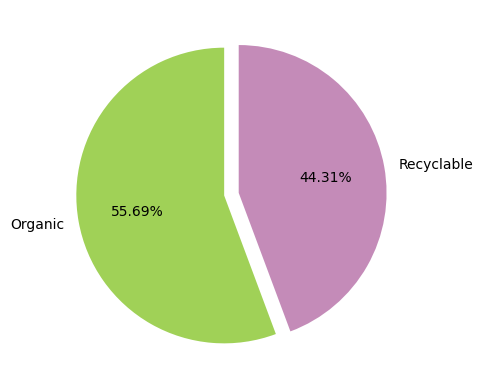

In [7]:
colors=['#a0d157','#c48bb8']
plt.pie(data['label'].value_counts(), labels=['Organic', 'Recyclable'], autopct='%0.2f%%', colors=colors, startangle=90, explode=[0.05, 0.05])
plt.show()

In [8]:
print("Class Distribution:")
print(data['label'].value_counts())

Class Distribution:
label
TRAIN\O    12565
TRAIN\R     9999
Name: count, dtype: int64


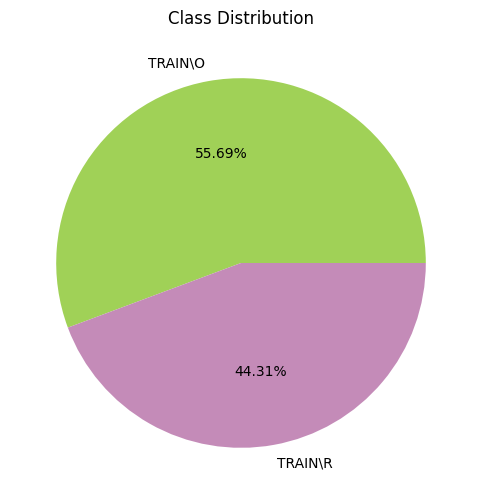

In [9]:
colors = ['#a0d157', '#c48bb8']
plt.figure(figsize=(6, 6))
plt.pie(data['label'].value_counts(), labels=data['label'].unique(), autopct='%0.2f%%', colors=colors)
plt.title('Class Distribution')
plt.show()

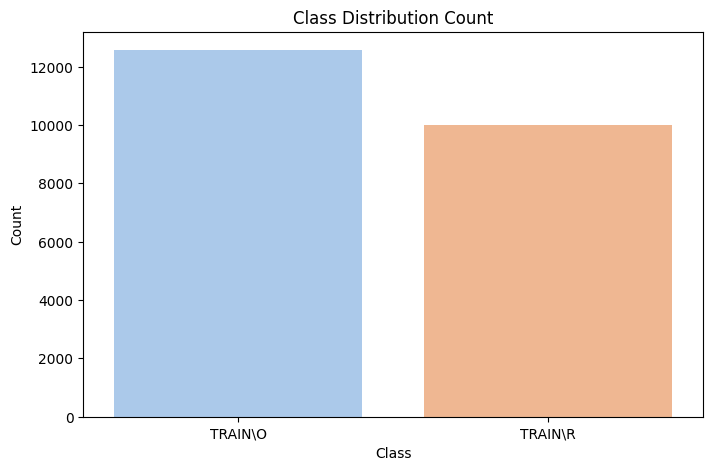

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['label'], palette="pastel")
plt.title('Class Distribution Count')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

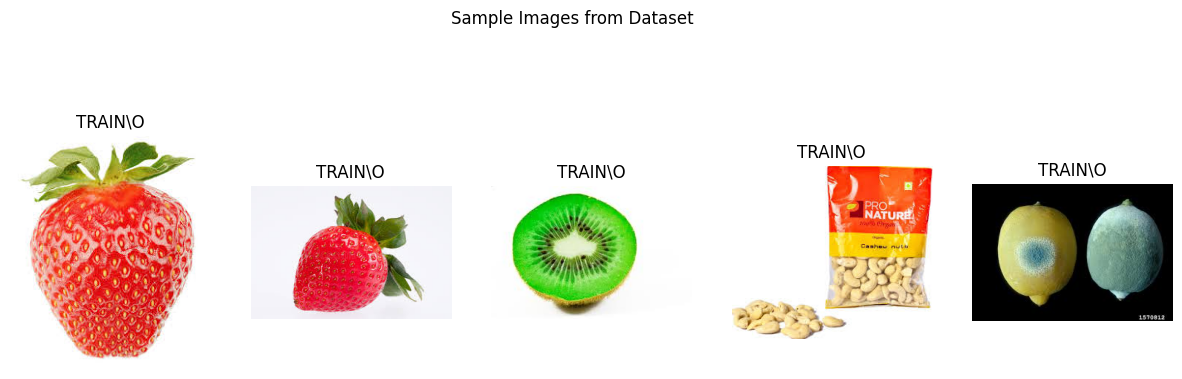

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(x_data[i])
    axes[i].set_title(y_data[i])
    axes[i].axis('off')
plt.suptitle('Sample Images from Dataset')
plt.show()

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Simulated dataset (replace with actual image dataset)
X = np.random.rand(1000, 128, 128, 3)  # 1000 images of size 128x128 with 3 channels
y = np.random.choice(['Organic', 'Recyclable'], 1000)  # Two classes: Organic and Recyclable

# Encode labels (Organic -> 0, Recyclable -> 1)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Normalize pixel values
X = X / 255.0

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: sigmoid activation
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=15,
    verbose=1
)

# Save the trained model
model.save('organic_vs_recyclable_model.keras')

# Save the label encoder to ensure consistent mapping during prediction
import pickle
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

print("Training completed and model saved.")


Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 291ms/step - accuracy: 0.5163 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 269ms/step - accuracy: 0.5484 - loss: 0.6914 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 298ms/step - accuracy: 0.5311 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 301ms/step - accuracy: 0.5304 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.5055 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 269ms/step - accuracy: 0.5143 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - accuracy: 0.5277 - loss: 0.6922 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - accuracy: 0.4897 - loss: 0.6942 - val_accuracy: 0

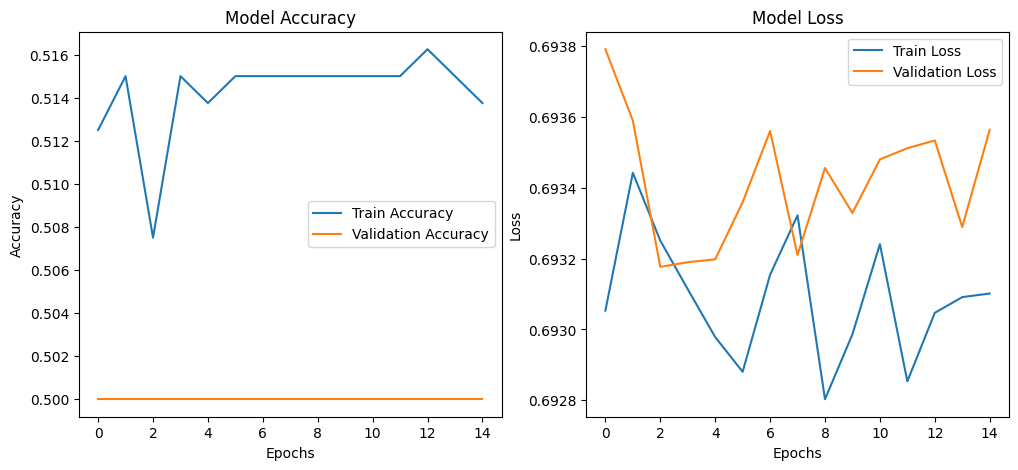

In [13]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

In [14]:
# Evaluate on validation set
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_acc*100:.2f}%')

# Predict and convert predictions to class labels
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Convert y_val to class labels if it's one-hot encoded
if len(y_val.shape) > 1 and y_val.shape[1] > 1:  # One-hot encoded
    y_val = np.argmax(y_val, axis=1)

# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_val, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print("Classification Report:\n", classification_report(y_val, y_pred_classes))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4667 - loss: 0.6955
Validation Accuracy: 50.00%
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
Confusion Matrix:
 [[100   0]
 [100   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       100
           1       0.00      0.00      0.00       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


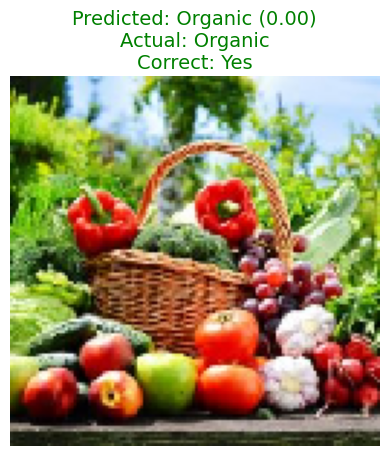

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


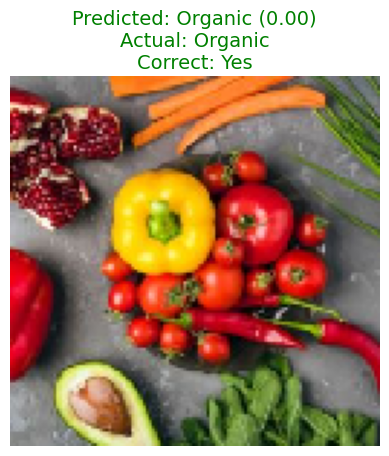

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


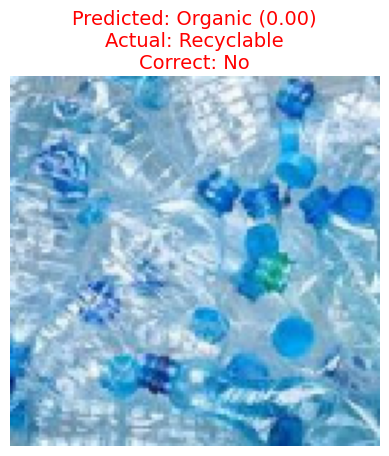

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


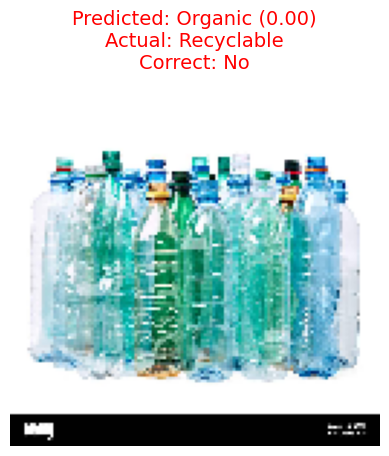

Overall Accuracy: 50.00%


In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('organic_vs_recyclable_model.keras')

# Load the saved label encoder
with open('label_encoder.pkl', 'rb') as file:
    encoder = pickle.load(file)

# Test images and expected labels
test_images = {
    'Dataset/veg.jpg': 'Organic',
    'Dataset/veg1.jpg': 'Organic',
    'Dataset/pls.jpg': 'Recyclable',
    'Dataset/12.jpg': 'Recyclable'
}

# Define image preprocessing function
def preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size)  # Resize image
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array

# Evaluate predictions
correct_predictions = 0

for img_path, true_label in test_images.items():
    # Preprocess the image
    img, img_array = preprocess_image(img_path)

    # Perform prediction
    prediction = model.predict(img_array)[0][0]

    # Determine the predicted class (0 = Organic, 1 = Recyclable)
    predicted_class_index = int(prediction > 0.5)  # Threshold 0.5 for binary classification
    predicted_label = encoder.inverse_transform([predicted_class_index])[0]

    # Compare prediction with actual label
    is_correct = predicted_label == true_label
    correct_predictions += int(is_correct)

    # Display the image with prediction results
    plt.imshow(img)
    plt.title(
        f'Predicted: {predicted_label} ({prediction:.2f})\n'
        f'Actual: {true_label}\n'
        f'Correct: {"Yes" if is_correct else "No"}',
        fontsize=14,
        color='green' if is_correct else 'red'
    )
    plt.axis('off')
    plt.show()

# Calculate and print overall accuracy
total_images = len(test_images)
accuracy = (correct_predictions / total_images) * 100
print(f'Overall Accuracy: {accuracy:.2f}%')
